# Chapter 15 - Random Forests

### 15.1 - Introduction

* Bagging or bootstrap aggregation (section 8.7) is a technique for reducing the variance of an estimated prediction function. Bagging seems to work especially well for high-variance, low-bias procedures, such as trees. 
* For regression, we simply fit the same regression tree many times to bootstrap sampled versions of the training data, and average the result. 
* For classification, a committee of trees each cast a vote for the predicted class.
* Boosting has a committee of weak learners that evolve over time and the members cast a weighted vote. Boosting appears to dominate bagging on most problems, and became the preferred choice.
* Random forests are a substantial modification of bagging that builds a large collection of de-correlated trees, and then averages them. 
* On many problems the performance of random forests is very similar to boosting, and they are simpler to train and tune. 

### 15.2 - Definition of Random Forests

* Trees are ideal candidates for bagging, since they can capture complex interaction structures in the data, and if grown sufficiently deep, have relatively low bias.
* Since trees are notoriously noisy, they benefit greatly from the averaging. 
* The bias of bagged trees is the same as that of the individual trees, and the only hope of improvement is through variance reduction. 
* We try to reduce the correlation between trees as much as possible. For this reason, we do things like select k <= p variables for each tree. Often $k=\sqrt{p}$ or as small as 1.  This reduces the overall variance of the estimates.
* Not all estimators can be improved by shaking up the data like this. It seems that highly nonlinear estimators, such as trees, benefit the most.
* Random forests do remarkably well, with very little tuning required.

### 15.3 - Details of Random Forests

* When used for classification, a random forest obtains a class vote from each tree, and then classifies using majority vote. 
* When used for regression, the predictions from each tree at a target point x are simply averaged.

Recommended default hyper-parameters:
* For classification, the default value for m is $\sqrt{p}$ and the minimum node size is one.
* For regression, the default value for m is $p/3$ and the minimum node size is five.
* In practice, they should be treated as tuning parameters.

**Out of Bag Samples**
* Out of bag sample -- for each observation $z_i = (x_i,y_i)$, construct its random forest predictor by averaging only those trees corresponding to bootstrap samples in which $z_i$ did not appear.
* An OOB error estimate is almost identical to that obtained by N-fold cross-validation.
* Hence unlike many other nonlinear estimators, random forests can be fit in one sequence, with cross-validation being performed along the way. 
* Once the OOB error stabilizes, the training can be terminated.

**Variable Importance**
* At each split in each tree, the improvement in the split-criterion is the importance measure attributed to the splitting variable, and is accumulated over all the trees in the forest separately for each variable.
* An alternative way to find variable importance is to pass the OOB samples down the tree and record the error. Then, you take the $j^{th}$ feature and randomly permute it (scramble its values) and then compute the OOB error again and see how much worse the error is.  The scrambling is intended to make the variable useless.

**Proximity Plots**
* Create an NxN matrix for the observation data.
* For every tree, any pair of OOB observations sharing a terminal node has their proximity increased by one. 
* The proximity plot gives an indication of which observations are effectively close together in the eyes of the random forest classifier.
* Proximity plots for random forests often look very similar, irrespective of the data, which casts doubt on their utility. 

**Random Forests and Overfitting**
* When the number of variables is large, but the fraction of relevant variables small, random forests are likely to perform poorly with small m. At each split the chance can be small that the relevant variables will be selected.
* When the number of relevant variables increases, the performance of random forests is surprisingly robust to an increase in the number of noise variables. 
* With 6 relevant and 100 noise variables, the probability of a relevant variable being selected at any split is 0.46 assuming $m = \sqrt{p} = \sqrt{106}$.
* Increasing B (the number of trees) does not cause the random forest sequence to overfit.
* The average of fully grown (not controlling the depth) trees can result in too rich of model, and incur unnecessary variance.

### 15.4 - Analysis of Random Forests

* Correlation between pairs of trees decreases as $m$ decreases (the number of variables randomly chosen).
* As in bagging, the bias of a random forest is the same as the bias of any of the individual sampled trees.
* Improvements in the prediction obtained by bagging or random forests are solely a result of variance reduction.
* As $m$ decreases, the bias increases.

Accuracy Score: 0.9736842105263158
Feature ranking:
1. feature 2 (0.442171)
2. feature 3 (0.424505)
3. feature 0 (0.098740)
4. feature 1 (0.034584)


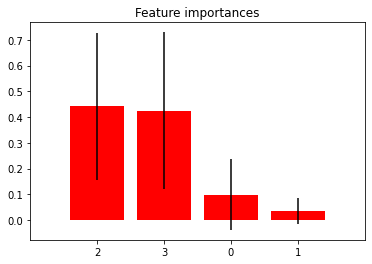

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 1)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print('Accuracy Score: {}'.format(accuracy_score(predicted, y_test)))

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()